In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

#splits data into 80-20 training and testing sets and returns a list containing them
def split(df):
    train_set = df.values.tolist()
    
    for x in range(len(train_set)):
        train_set[x].append(0) #add space for euclidean distances
        train_set[x].append("prediction") #add space for prediction labels
    
    test_set = []
    train_test = []
    
    test_size = int(len(train_set) * 0.2)
    for y in range(test_size):
        test_set.append(train_set.pop(random.randint(0, len(train_set) - 1)))
    
    for z in range(len(train_set)):
        train_set[z][6] = train_set[z][4] #set prediction label equal to actual label for training set
        
    train_test.append(train_set)
    train_test.append(test_set)
                    
    return train_test

#computes euclidean distance in terms of sepal length and width given flowers p and q
def euclidean_distance(p, q):
    distance = math.sqrt((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2)
    return distance

#returns a list containing the 5 nearest neighbours of p
def nearest_neighbours(train_set, p):
    nn = []
    
    for x in range(len(train_set)):
        train_set[x][5] = euclidean_distance(train_set[x], p)
        nn.append(train_set[x])
        
    nn.sort(key = lambda y: y[5])
    return nn[:6]

#classifies flower p based on its 5 nearest neighbours
def classify(train_set, nn, p):
    labels = ["setosa", "versicolor", "virginica"]
    label_count = [0, 0, 0]
    
    for x in range(5):
        for y in nn[x]:
            if (y in labels):
                label_count[labels.index(y)] += 1
           
    p[6] = labels[label_count.index(max(label_count))]
    
    train_set.append(p)
    
def knn(df):    
    train_test = split(iris_df)

    train_set = train_test[0]
    test_set = train_test[1]

    for x in range(len(test_set)):
        nn = nearest_neighbours(train_set, test_set[x])
        classify(train_set, nn, test_set[x])
        
    for y in range(len(train_set)):
        train_set[y].pop(5)
        
    #for z in range(len(test_set)):
    #    test_set[z].pop(5)
        
    return train_set, test_set

def accuracy(test_set):
    correct_predictions = 0.0
    for x in range(len(test_set)):
        if (test_set[x][4] == test_set[x][5]):
            correct_predictions += 1
    
    result = correct_predictions / len(test_set)
    print(str(result)[:6])

In [2]:
iris_df = pd.read_csv("iris.csv")
results = knn(iris_df)

iris_all = results[0]
iris_all_df = pd.DataFrame(iris_all, columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", 
                                       "species", "prediction"])

predictions = results[1]
predictions_df = pd.DataFrame(predictions, columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", 
                                       "species", "prediction"])
accuracy(predictions)

0.7666


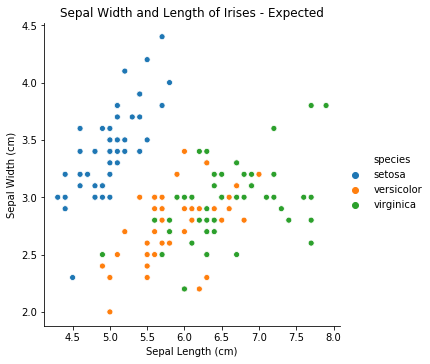

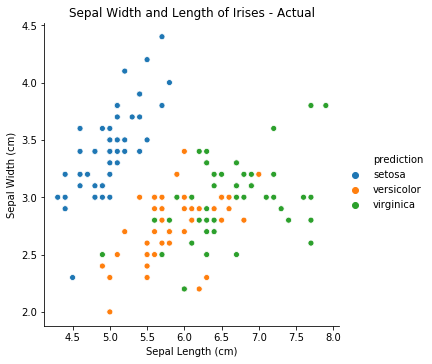

In [3]:
#scatterplots of training and testing sets
actual_scatter = sns.relplot(x = "sepal_length", y = "sepal_width", hue = "species", data = iris_all_df)
actual_scatter.set(title = "Sepal Width and Length of Irises - Expected", 
                 xlabel = "Sepal Length (cm)",  
                 ylabel = "Sepal Width (cm)")
plt.show()

prediction_scatter = sns.relplot(x = "sepal_length", y = "sepal_width", hue = "prediction", data = iris_all_df)
prediction_scatter.set(title = "Sepal Width and Length of Irises - Actual", 
                 xlabel = "Sepal Length (cm)",  
                 ylabel = "Sepal Width (cm)")
plt.show()

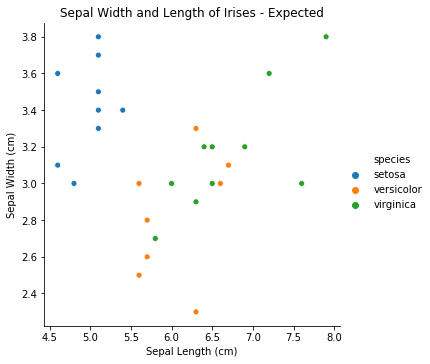

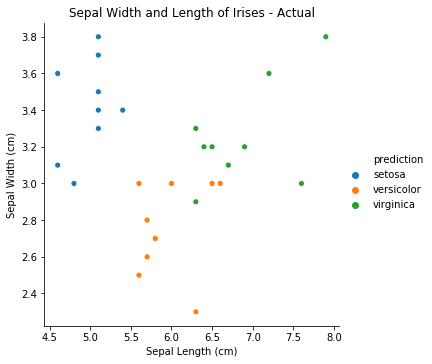

In [4]:
#scatterplots of predictions (testing set) only 
actual_scatter = sns.relplot(x = "sepal_length", y = "sepal_width", hue = "species", data = predictions_df)
actual_scatter.set(title = "Sepal Width and Length of Irises - Expected", 
                 xlabel = "Sepal Length (cm)",  
                 ylabel = "Sepal Width (cm)")
plt.show()

prediction_scatter = sns.relplot(x = "sepal_length", y = "sepal_width", hue = "prediction", data = predictions_df)
prediction_scatter.set(title = "Sepal Width and Length of Irises - Actual", 
                 xlabel = "Sepal Length (cm)",  
                 ylabel = "Sepal Width (cm)")
plt.show()